# 5. Análise de Sobrevivência para 2.º Golo do Jogo

In [1]:
# directoria de trabalho
setwd('');
# chamar pacotes survival, DBI (para ligar base-de-dados), ggplot2 (graficos)
library(survival);
library(DBI);
library(ggplot2);
library(plyr);
library(IRdisplay);

conectar à base de dados

In [2]:
#ligar a base de dados foot.db
foot <- dbConnect(RSQLite::SQLite(), "foot.db")

EVENTO de INTERESSE: sec_goal &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     => 2.º golo do jogo ($t_0=0$)

EVENTO de INTERESSE: sec_goal_home => 2.º golo do jogo quando marcado pela equipa "casa" ($t_0=0$)

EVENTO de INTERESSE: sec_goal_away => 2.º golo do jogo quando marcado pela equipa "fora" ($t_0=0$)

recolher dados

In [3]:
sec_goal <- dbGetQuery(foot, 'select id, tempo, cens, liga, equip from goal_2');
sec_goal_home <- dbGetQuery(foot, 'select id, tempo, (cens+equip)%2 as cens,
liga from goal_2');
sec_goal_away <- dbGetQuery(foot, 'select id, tempo, (cens+equip)/2 as cens,
liga from goal_2');
dbDisconnect(foot);
rm(foot);

preparar pallete de cores

In [4]:
color_pallete_function <- colorRampPalette(
  colors = c("black","red","green3","blue" ,"cyan","orange"),
  space = "Lab");
num_colors=6;
colors <- color_pallete_function(num_colors);

### 5.1.) EKM - Evento: 2.º golo do jogo
obter tempos, censura (censurado/observado), liga e equipa para descrição do evento

In [5]:
temp <- sec_goal$tempo;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

ajustar o Estimador de Kaplan-Meier aos dados

In [6]:
ekm<-survfit(Surv(temp, cens) ~ liga);
quantile(ekm)$quantile;

25 50 75
liga=1 39 61 90
liga=2 36 56 85
liga=3 34 53 79
liga=4 37 56 87
liga=5 40 61 90
liga=6 36 58 86

aplicar o Teste de log-rank

In [7]:
survdiff(Surv(temp, cens) ~ liga,rho=0);

Call:
survdiff(formula = Surv(temp, cens) ~ liga, rho = 0)

          N Observed Expected (O-E)^2/E (O-E)^2/V
liga=1 1237      954     1043    7.5973    9.0511
liga=2 1653     1327     1290    1.0733    1.3296
liga=3 1350     1136      987   22.5522   26.6152
liga=4 1668     1320     1310    0.0732    0.0910
liga=5 1642     1283     1394    8.9131   11.2418
liga=6 1708     1371     1367    0.0137    0.0172

 Chisq= 41.2  on 5 degrees of freedom, p= 9e-08 

desenhar gráfico e respectiva legenda

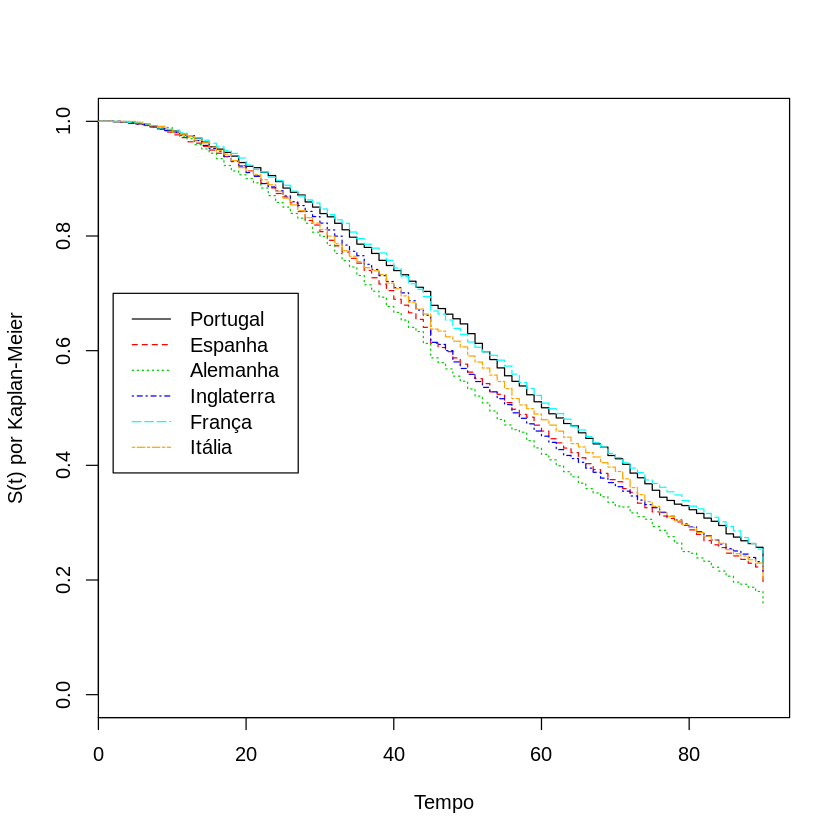

In [8]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", 
     ylab="S(t) por Kaplan-Meier", col=colors);
legend(2,0.70,lty=c(1,2,3,4,5,6),
       c("Portugal","Espanha","Alemanha",
         "Inglaterra","França","Itália"),col=colors);

### 5.2.) EKM - Evento: 2.º golo do jogo marcado pela equipa de casa (“second goal of the game is home)”
obter tempos e descrição do evento (censurado/observado)

In [9]:
temp <- sec_goal_home$tempo;
cens <- sec_goal_home$cens;
ligas <- factor(sec_goal_home$liga);
# reatribuir valores para liga
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));

ajustar o Estimador de Kaplan-Meier aos dados

In [10]:
ekm<-survfit(Surv(temp, cens) ~ liga);
quantile(ekm)$quantile

25 50 75
liga=1 52 85 90
liga=2 45 79 90
liga=3 45 78 90
liga=4 48 82 90
liga=5 51 85 90
liga=6 51 81 90

aplicar o Teste de log-rank

In [11]:
survdiff(Surv(temp, cens) ~ liga,rho=0);

Call:
survdiff(formula = Surv(temp, cens) ~ liga, rho = 0)

          N Observed Expected (O-E)^2/E (O-E)^2/V
liga=1 1237      697      745    3.1223    4.2428
liga=2 1653      949      909    1.7428    2.4417
liga=3 1350      752      677    8.4058   11.0281
liga=4 1668      926      930    0.0201    0.0284
liga=5 1642      955      992    1.4167    2.0333
liga=6 1708      939      964    0.6564    0.9320

 Chisq= 17.7  on 5 degrees of freedom, p= 0.003 

desenhar gráfico e respectiva legenda

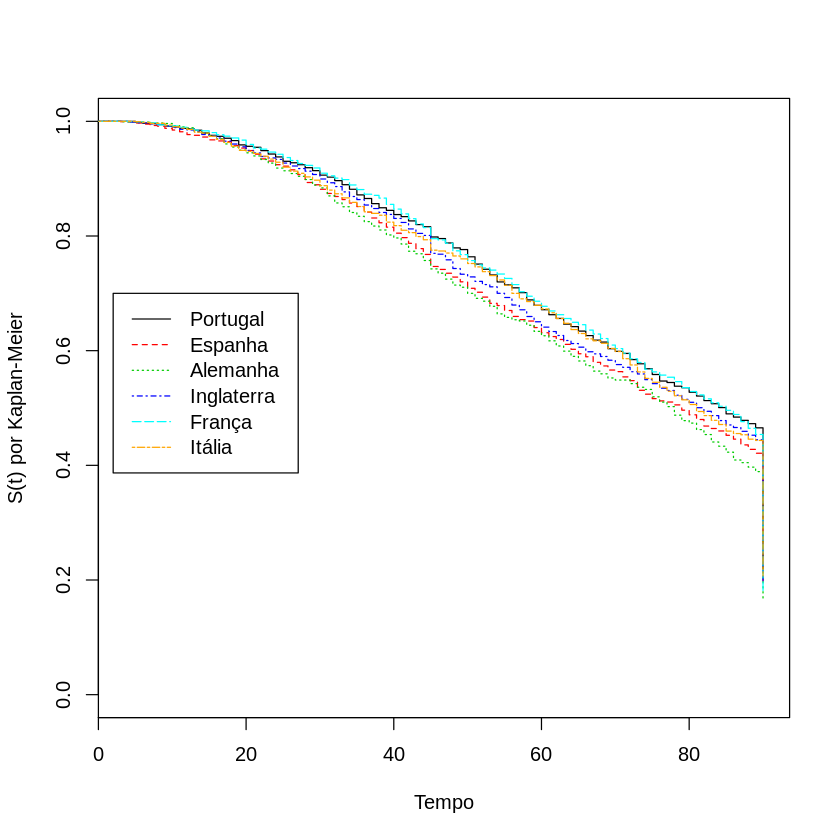

In [12]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo", 
     ylab="S(t) por Kaplan-Meier", col=colors);
legend(2,0.70,lty=c(1,2,3,4,5,6),
       c("Portugal","Espanha","Alemanha",
         "Inglaterra","França","Itália"),col=colors);

### 5.3.) EKM - Evento: 2.º golo do jogo marcado pela equipa de fora (“second goal of the game is away”)
obter tempos e descrição do evento (censurado/observado)

In [13]:
temp <- sec_goal_away$tempo;
cens <- sec_goal_away$cens;
ligas <- factor(sec_goal_away$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));

ajustar o Estimador de Kaplan-Meier aos dados

In [14]:
ekm<-survfit(Surv(temp,cens) ~ liga);
quantile(ekm)$quantile

25 50 75
liga=1 60 NA NA
liga=2 57 NA NA
liga=3 52 85 NA
liga=4 53 NA NA
liga=5 61 NA NA
liga=6 55 90 NA

aplicar o Teste de log-rank

In [15]:
survdiff(Surv(temp,cens) ~ liga,rho=0);

Call:
survdiff(formula = Surv(temp, cens) ~ liga, rho = 0)

          N Observed Expected (O-E)^2/E (O-E)^2/V
liga=1 1237      404      449     4.496     5.281
liga=2 1653      548      556     0.101     0.124
liga=3 1350      503      426    14.025    16.339
liga=4 1668      588      564     1.037     1.272
liga=5 1642      534      600     7.299     9.078
liga=6 1708      606      589     0.500     0.619

 Chisq= 27.7  on 5 degrees of freedom, p= 4e-05 

desenhar gráfico e respectiva legenda

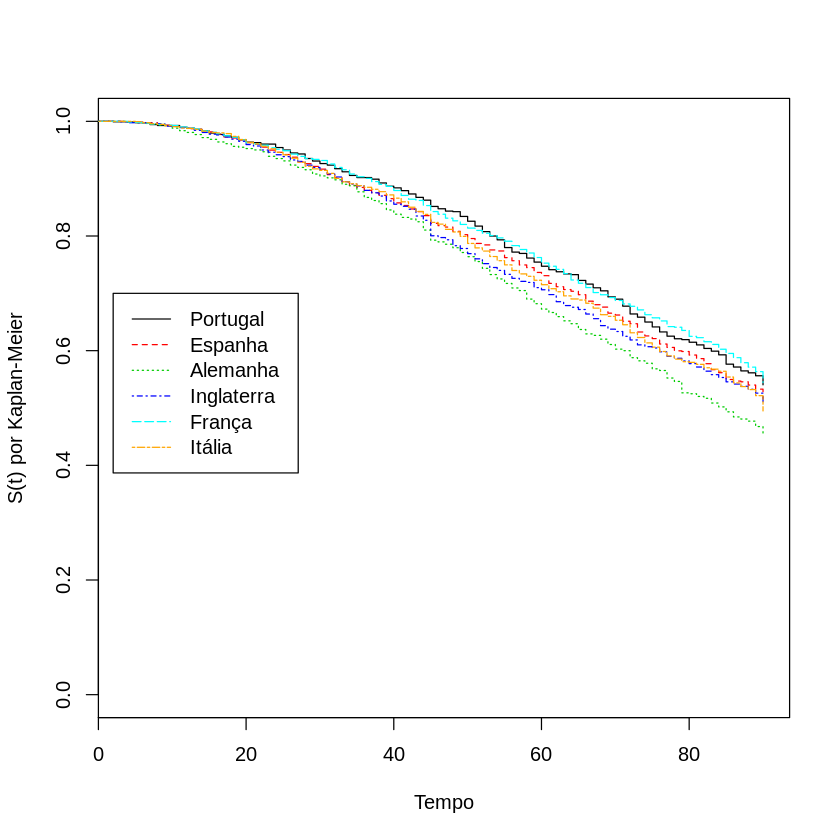

In [16]:
plot(ekm, lty=c(1,2,3,4,5,6), xlab="Tempo",
     ylab="S(t) por Kaplan-Meier", col=colors);
legend(2,0.70,lty=c(1,2,3,4,5,6),
       c("Portugal","Espanha","Alemanha",
        "Inglaterra","França","Itália"),col=colors);

## 5.4.) Modelo de Riscos Porporcionais de Cox - 2.º Golo
resíduos de Schoenfeld

In [17]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, tempo, cens, equip, liga, odds, 
case (tempo/46) when 0 then 1 when 1 then 2 else 2 end part, 
case when equip_golo1 = equip then 1 else 0 end same from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$tempo;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
equip <- factor(sec_goal$equip);
odds <- as.numeric(sec_goal$odds);
fit <- coxph(Surv(temp, cens) ~ equip + liga + odds, 
             method="breslow");
summary(fit);
#fit2 <- survfit(Surv(temp,cens) ~ liga);
#quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ equip + liga + odds, method = "breslow")

  n= 9258, number of events= 7391 

            coef exp(coef)  se(coef)      z Pr(>|z|)    
equip1 -0.159251  0.852782  0.023526 -6.769 1.30e-11 ***
liga2   0.116947  1.124060  0.042480  2.753  0.00591 ** 
liga3   0.232916  1.262276  0.043960  5.298 1.17e-07 ***
liga4   0.101065  1.106349  0.042550  2.375  0.01754 *  
liga5   0.007766  1.007797  0.042884  0.181  0.85629    
liga6   0.094002  1.098562  0.042253  2.225  0.02610 *  
odds    0.001384  1.001385  0.005809  0.238  0.81171    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
equip1    0.8528     1.1726    0.8144     0.893
liga2     1.1241     0.8896    1.0343     1.222
liga3     1.2623     0.7922    1.1581     1.376
liga4     1.1063     0.9039    1.0178     1.203
liga5     1.0078     0.9923    0.9266     1.096
liga6     1.0986     0.9103    1.0113     1.193
odds      1.0014     

In [18]:
rsch <- resid(fit, type="scaledsch")
summary(rsch)

       V1                V2                 V3                 V4          
 Min.   :-2.5072   Min.   :-7.84408   Min.   :-7.84144   Min.   :-7.95132  
 1st Qu.:-1.9024   1st Qu.: 0.02404   1st Qu.: 0.09317   1st Qu.:-0.02201  
 Median :-1.7976   Median : 0.09802   Median : 0.21847   Median : 0.07678  
 Mean   :-0.1593   Mean   : 0.11695   Mean   : 0.23292   Mean   : 0.10107  
 3rd Qu.: 2.1481   3rd Qu.: 0.24292   3rd Qu.: 0.37863   3rd Qu.: 0.24709  
 Max.   : 2.3710   Max.   : 7.28947   Max.   : 7.89072   Max.   : 6.59352  
       V5                  V6                 V7           
 Min.   :-8.068061   Min.   :-7.95673   Min.   :-0.509853  
 1st Qu.:-0.171305   1st Qu.:-0.05073   1st Qu.:-0.271004  
 Median :-0.072586   Median : 0.04058   Median :-0.151364  
 Mean   : 0.007766   Mean   : 0.09400   Mean   : 0.001384  
 3rd Qu.: 0.267001   3rd Qu.: 0.33409   3rd Qu.: 0.027216  
 Max.   : 7.830128   Max.   : 6.92199   Max.   : 5.762179  

            rho  chisq        p
equip1 -0.04536 14.967 1.09e-04
liga2  -0.01746  2.258 1.33e-01
liga3  -0.01032  0.786 3.75e-01
liga4  -0.02035  3.061 8.02e-02
liga5   0.00752  0.419 5.18e-01
liga6  -0.00656  0.318 5.73e-01
odds   -0.03098  8.030 4.60e-03
GLOBAL       NA 33.929 1.78e-05

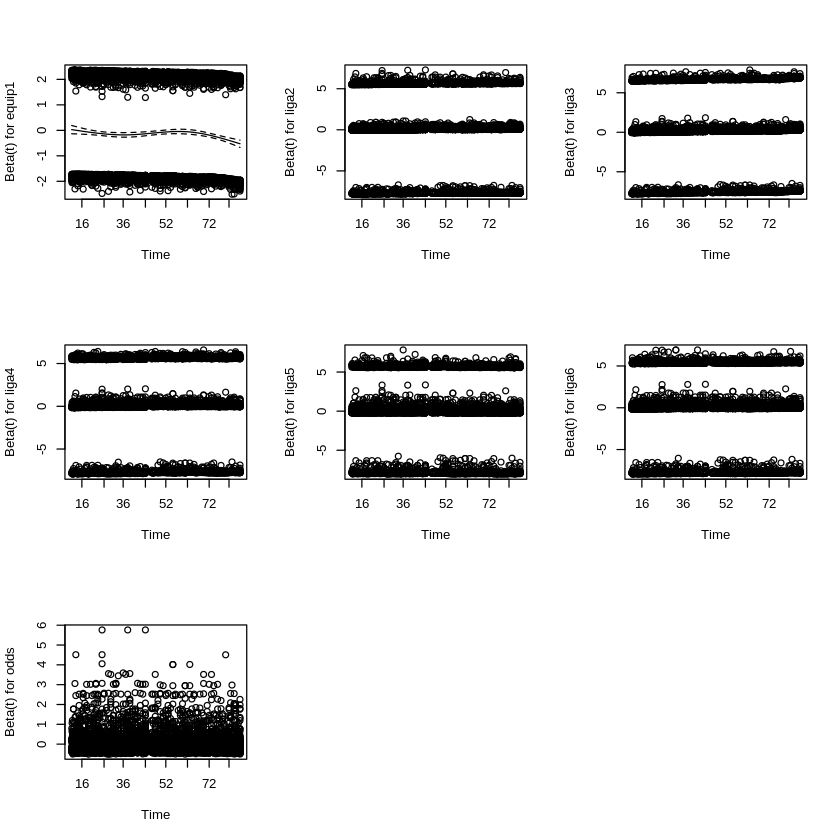

In [19]:
cox.zph(fit, transform="identity")
par(mfrow=c(3, 3))
plot(cox.zph(fit))

&nbsp;

pela análise dos resultados anteriores concluímos que será mais eficiente elaborar modelo considerando que estamos perante 2 tipos diferentes de fenómenos quando ocorre o 2.º golo em função também da equipa que produziu o evento, neste sentido temos 4 tipos de eventos:

evento 1) equipa de casa lidera (1-0) e equipa de casa marca 2.º golo (2-0) => de 1-0 para 2-0 (10_20);

evento 2) equipa de casa lidera (1-0) e ocorre o empate (1-1) => de 1-0 para 1-1 (10_11);

evento 3) equipa de fora lidera (0-1) e equipa de fora marca o 2º golo (0-2) => de 0-1 para 0_2 (01_02);

evento 4) equipa de fora lidera (0-1) e ocorre o empate (1-1) => de 0-1 para 1-1 (01_11);


e também foram consideradas as variáveis:
<strong>
<ol>
    <li> ligas</li>
    <li> odds</li>
</ol>
</strong>

&nbsp;...

## 5.3.1) Modelo de Riscos Porporcionais de Cox - 1.º Golo Casa/2.º Golo Casa (10_20)

In [20]:
#modelo 1-0_2-0
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, tempo, (cens+equip)%2 as cens, liga, 
odds from goal_2'
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$tempo;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
odds <- as.numeric(sec_goal$odds);
#part <- factor(sec_goal$part);
fit_10_20 <- coxph(Surv(temp, cens) ~ liga + odds, 
                   method="breslow");
summary(fit_10_20);
#fit2 <- survfit(Surv(temp,cens) ~ liga);
#quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 9258, number of events= 5218 

           coef exp(coef)  se(coef)       z Pr(>|z|)    
liga2  0.068630  1.071040  0.049909   1.375  0.16910    
liga3  0.141457  1.151951  0.052608   2.689  0.00717 ** 
liga4  0.035175  1.035801  0.050149   0.701  0.48305    
liga5 -0.026571  0.973779  0.049827  -0.533  0.59385    
liga6 -0.003172  0.996833  0.050006  -0.063  0.94941    
odds  -0.203094  0.816202  0.011977 -16.957  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.0710     0.9337    0.9712    1.1811
liga3    1.1520     0.8681    1.0391    1.2771
liga4    1.0358     0.9654    0.9388    1.1428
liga5    0.9738     1.0269    0.8832    1.0737
liga6    0.9968     1.0032    0.9038    1.0995
odds     0.8162     1.2252    0.7973    0.8356

Concordance= 0.603  (se = 0.005 )
Rsquare= 0.044   (max possible= 1 )
Likelihood ratio test=

# retirar ligas=6

In [21]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="1", "27"="1", "28"="1", "29"="1", "30"="1"));
fit_10_20_B <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_20$loglik[2]-fit_10_20_B$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.004024334

[1] 0.3781149

In [38]:
summary(fit_10_20_B)[7]$coefficients;

coef        exp(coef) se(coef)   z           Pr(>|z|)    
liga2  0.07045309 1.0729942 0.04081817   1.7260226 8.434334e-02
liga3  0.14328017 1.1540531 0.04407802   3.2506036 1.151603e-03
liga4  0.03699711 1.0376900 0.04112669   0.8995888 3.683391e-01
liga5 -0.02474860 0.9755551 0.04072703  -0.6076701 5.434063e-01
odds  -0.20308157 0.8162117 0.01197573 -16.9577628 1.686443e-64

# retirar ligas=5

In [22]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", 
                         "26"="1", "27"="1", "28"="1", "29"="1", "30"="1"));
fit_10_20_C <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_20_B$loglik[2]-fit_10_20_C$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.3700557

[1] 0.3781149

In [23]:
summary(fit_10_20_C)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)    
liga2  0.07965112 1.0829092 0.03795457   2.098591 3.585295e-02
liga3  0.15246878 1.1647061 0.04144597   3.678736 2.343924e-04
liga4  0.04618683 1.0472700 0.03829159   1.206187 2.277453e-01
odds  -0.20299812 0.8162798 0.01198127 -16.942951 2.169641e-64

# retirar ligas=4

In [24]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="1", "17"="1", "18"="1", "19"="1", "20"="1",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", 
                         "26"="1", "27"="1", "28"="1", "29"="1", "30"="1"));
fit_10_20_D <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_20_C$loglik[2]-fit_10_20_D$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 1.444248

[1] 0.3781149

# PARAR processo de seleção
## usar fit_10_20_C

In [25]:
fit_10_20_C$coefficients;

liga2       liga3       liga4        odds 
 0.07965112  0.15246878  0.04618683 -0.20299812

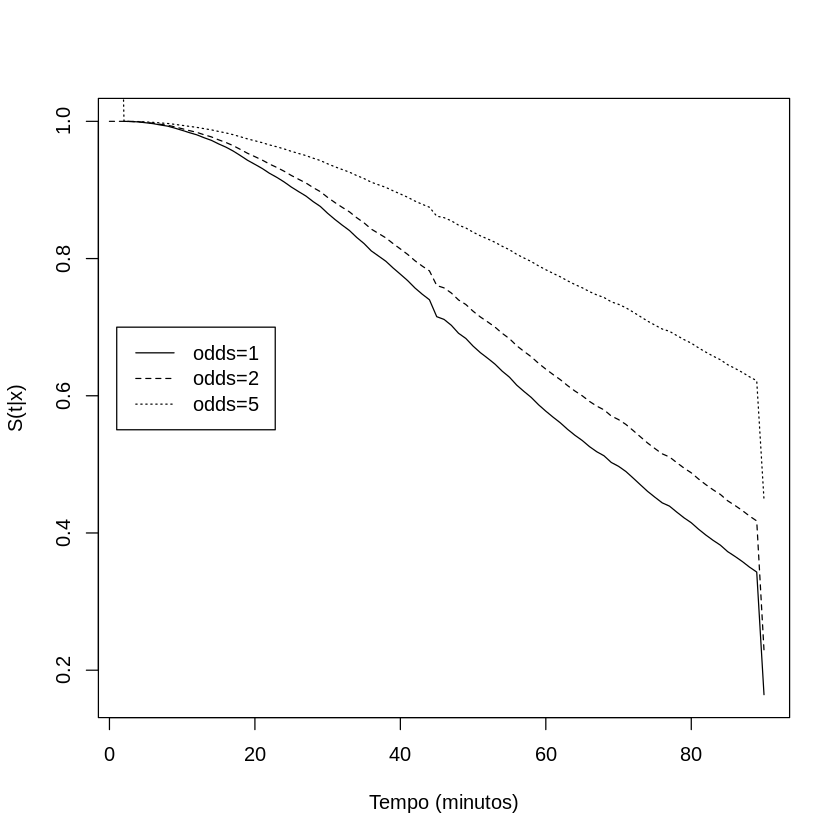

In [26]:
#calculo do risco de base para part=1, liga=1 e odds=1,2,5
betas_fit_10_20_C <- fit_10_20_C$coefficients;
ht_10_20 <- basehaz(fit_10_20_C, centered=F);
tempo_0 <- ht_10_20$time
H0_10_20 <- ht_10_20$hazard
S0_10_20 <- exp(-H0_10_20)
S1_10_20 <- S0_10_20^exp(betas_fit_10_20_C[4])
S2_10_20 <- S0_10_20^exp(betas_fit_10_20_C[4]*2)
S5_10_20 <- S0_10_20^exp(betas_fit_10_20_C[4]*5)
plot(tempo_0, S1_10_20, lty=1, type="l", xlab="Tempo (minutos)", ylab="S(t|x)")
lines(c(0, tempo_0), c(1, S2_10_20), lty=2)
lines(c(0, tempo_0), c(2, S5_10_20), lty=3)
legend(1, 0.7, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"))

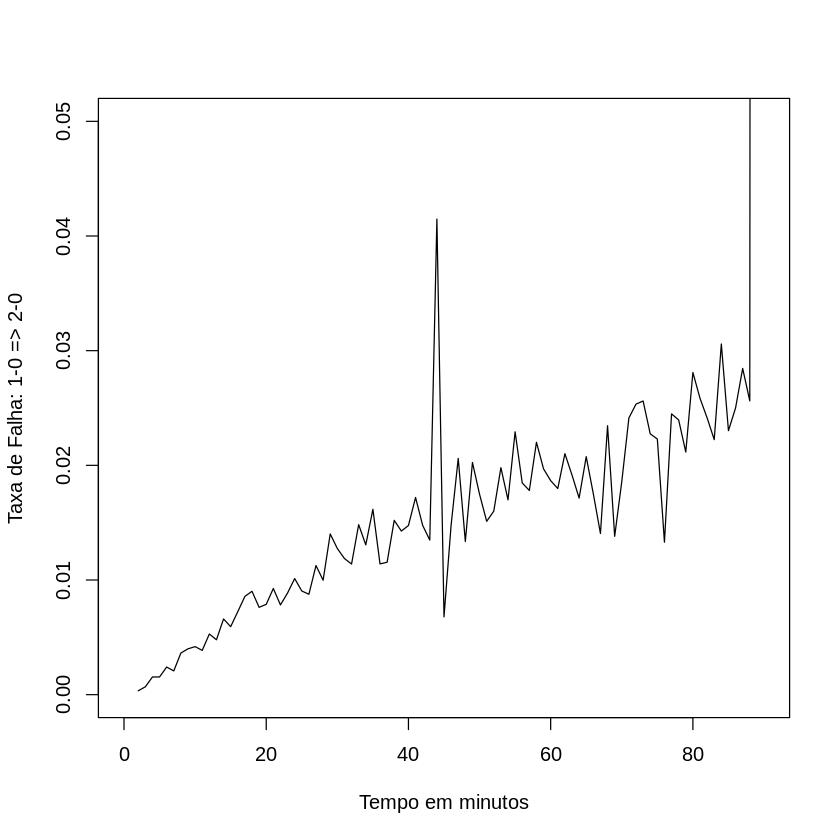

In [27]:
Ht<-basehaz(fit_10_20_C,centered=F)
l0=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_0[1:length(tempo_0)-1],l0,lty=1,type="l",
     xlim=range(c(0,max(tempo_0))), ylim=range(c(0,0.05)),xlab="Tempo em minutos",
     ylab="Taxa de Falha: 1-0 => 2-0");

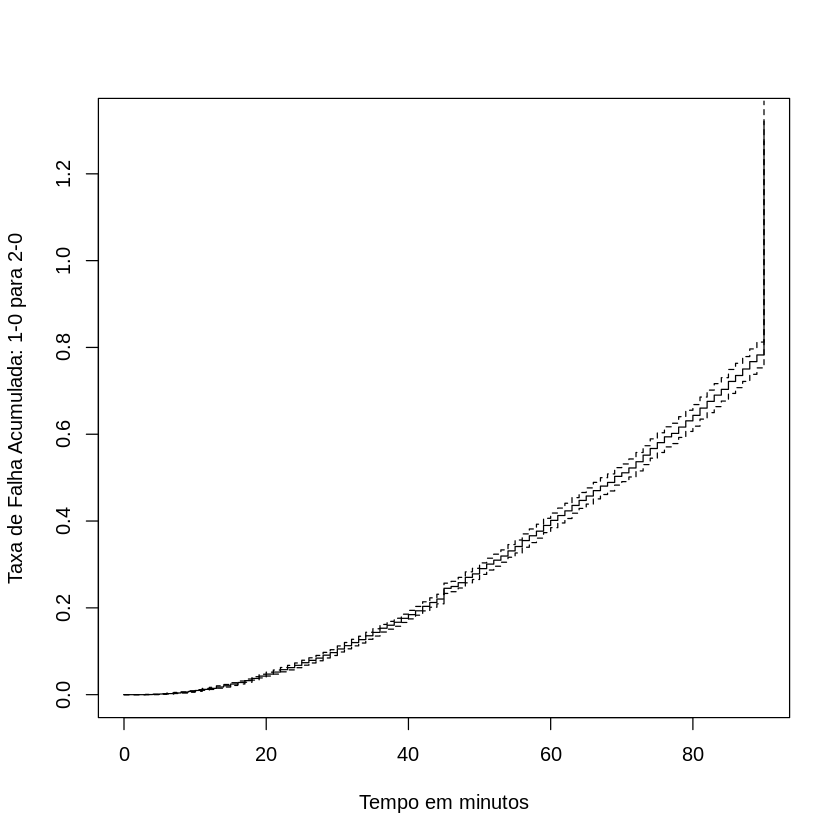

In [16]:
surv2 <- survfit(fit_10_20_C);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", 
     ylab="Taxa de Falha Acumulada: 1-0 para 2-0");

## 5.3.2) Modelo de Riscos Porporcionais de Cox - 1.º Golo Casa/2.º Golo Fora (10_11)

In [2]:
#modelo 1-0 para 1-1
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, tempo, 
(((cens+equip)/2 + equip_golo1)%2 + equip)/2 as cens,
liga, odds from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$tempo;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
odds <- as.numeric(sec_goal$odds)
#part <- factor(sec_goal$part);
fit_10_11 <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit_10_11);
#fit2 <- survfit(Surv(temp,cens) ~ liga);
#quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 9258, number of events= 1774 

          coef exp(coef) se(coef)      z Pr(>|z|)   
liga2  0.01049   1.01055  0.08867  0.118  0.90582   
liga3  0.25476   1.29015  0.08918  2.857  0.00428 **
liga4  0.11849   1.12580  0.08636  1.372  0.17004   
liga5 -0.05144   0.94986  0.08844 -0.582  0.56079   
liga6  0.17647   1.19300  0.08469  2.084  0.03717 * 
odds  -0.01416   0.98594  0.01251 -1.132  0.25771   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.0105     0.9896    0.8493     1.202
liga3    1.2901     0.7751    1.0832     1.537
liga4    1.1258     0.8883    0.9505     1.333
liga5    0.9499     1.0528    0.7987     1.130
liga6    1.1930     0.8382    1.0105     1.408
odds     0.9859     1.0143    0.9621     1.010

Concordance= 0.533  (se = 0.007 )
Rsquare= 0.002   (max possible= 0.962 )
Likelihood ratio test= 21.27  on 6 df,   p=0.0

# retirar ligas=2

In [3]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="1", "7"="1", "8"="1", "9"="1", "10"="1", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit_10_11_B <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_11$loglik[2]-fit_10_11_B$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.01400406

[1] 0.3781149

In [4]:
summary(fit_10_11_B)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)    
liga3  0.24892812 1.2826498 0.07425969  3.3521299 0.0008019239
liga4  0.11266205 1.1192536 0.07084332  1.5902988 0.1117674699
liga5 -0.05728074 0.9443289 0.07330112 -0.7814443 0.4345412335
liga6  0.17063726 1.1860604 0.06875776  2.4817164 0.0130751285
odds  -0.01420853 0.9858919 0.01250052 -1.1366350 0.2556908984

# retirar ligas = 5

In [5]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="1", "7"="1", "8"="1", "9"="1", "10"="1", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="1", "22"="1", "23"="1", "24"="1", "25"="1", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit_10_11_C <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_10_11_B$loglik[2]-fit_10_11_C$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.6137647

[1] 0.3781149

In [6]:
summary(fit_10_11_C)[7]$coefficients;

coef       exp(coef) se(coef)   z         Pr(>|z|)    
liga3  0.2700267 1.3099995 0.06936455  3.892864 0.0000990679
liga4  0.1337910 1.1431539 0.06567824  2.037068 0.0416432538
liga6  0.1918458 1.2114837 0.06337974  3.026926 0.0024705429
odds  -0.0135807 0.9865111 0.01249033 -1.087298 0.2769052205

retirar odds

In [8]:
fit_10_11_D <- coxph(Surv(temp, cens) ~ liga, method="breslow");
TRV <- 2*(fit_10_11_C$loglik[2]-fit_10_11_D$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 1.21924

[1] 0.3781149

# PARAR PROCESSO
### usar modelo com ligas=5

In [9]:
summary(fit_10_11_B)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)    
liga3  0.24892812 1.2826498 0.07425969  3.3521299 0.0008019239
liga4  0.11266205 1.1192536 0.07084332  1.5902988 0.1117674699
liga5 -0.05728074 0.9443289 0.07330112 -0.7814443 0.4345412335
liga6  0.17063726 1.1860604 0.06875776  2.4817164 0.0130751285
odds  -0.01420853 0.9858919 0.01250052 -1.1366350 0.2556908984

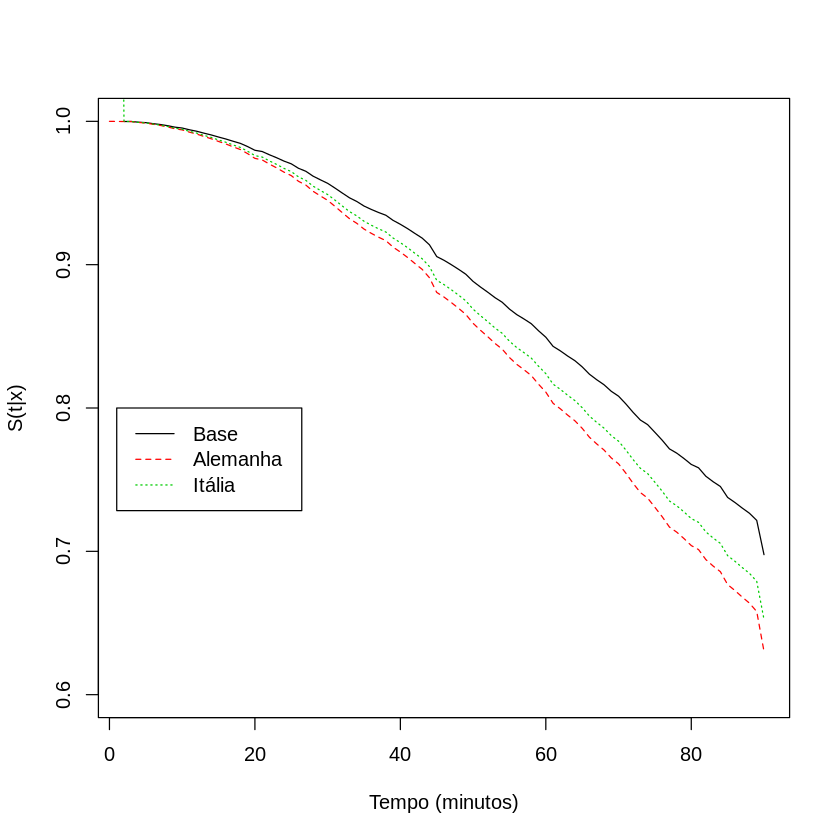

In [10]:
#calculo do risco de base para part=1, liga=1 e odds=1
betas_10_11 <- fit_10_11_B$coefficients
ht_10_11 <- basehaz(fit_10_11_B, centered=F)
tempo_1 <- ht_10_11$time
H0_10_11 <- ht_10_11$hazard
S0_10_11 <- exp(-H0_10_11)
S1_10_11 <- S0_10_11^exp(betas_10_11[5])
S2_10_11 <- S0_10_11^exp(betas_10_11[5]+betas_10_11[1])
S5_10_11 <- S0_10_11^exp(betas_10_11[5]+betas_10_11[4])
plot(tempo_1, S1_10_11, lty=1, type="l", ylim=c(0.6,1), 
     xlab="Tempo (minutos)", ylab="S(t|x)", col=colors)
lines(c(0, tempo_1), c(1, S2_10_11), lty=2, col=colors[2])
lines(c(0, tempo_1), c(2, S5_10_11), lty=3, col=colors[3])
legend(1, 0.8, lty=c(1, 2, 3), c("Base", "Alemanha", 
                                 "Itália"), col=colors)

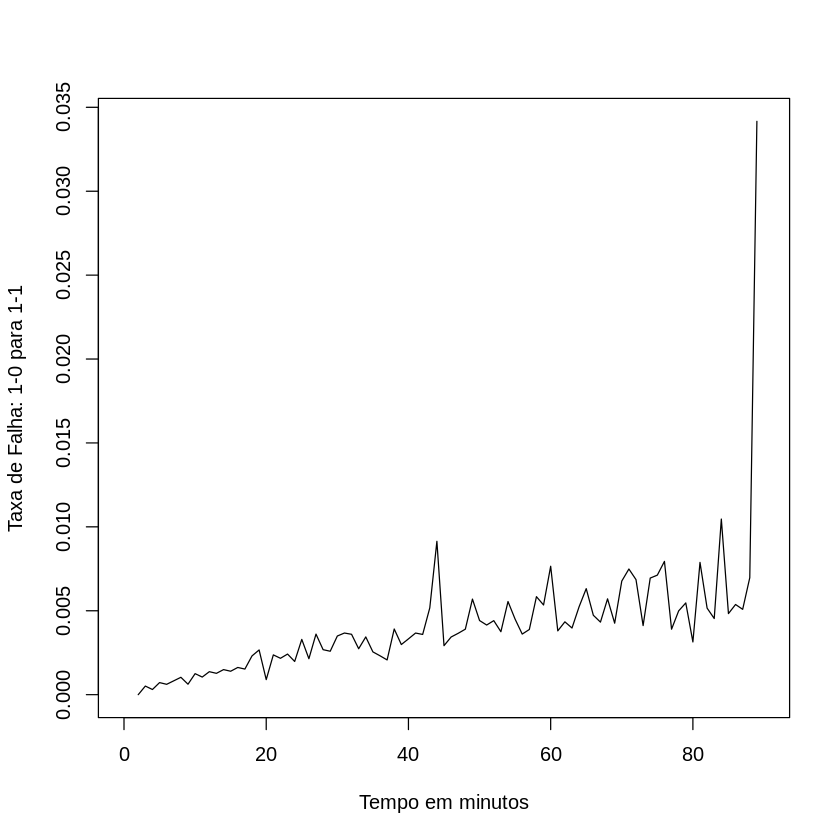

In [11]:
Ht_1<-basehaz(fit_10_11_B,centered=F)
l1=(Ht_1[2:dim(Ht_1)[1],1]-Ht_1[1:dim(Ht_1)[1]-1,1])/(Ht_1[2:dim(Ht_1)[1],2]-Ht_1[1:dim(Ht_1)[1]-1,2])
plot(tempo_1[1:length(tempo_1)-1],l1,lty=1,type="l",
     xlim=range(c(0,max(tempo_1))),xlab="Tempo em minutos",
     ylab="Taxa de Falha: 1-0 para 1-1");

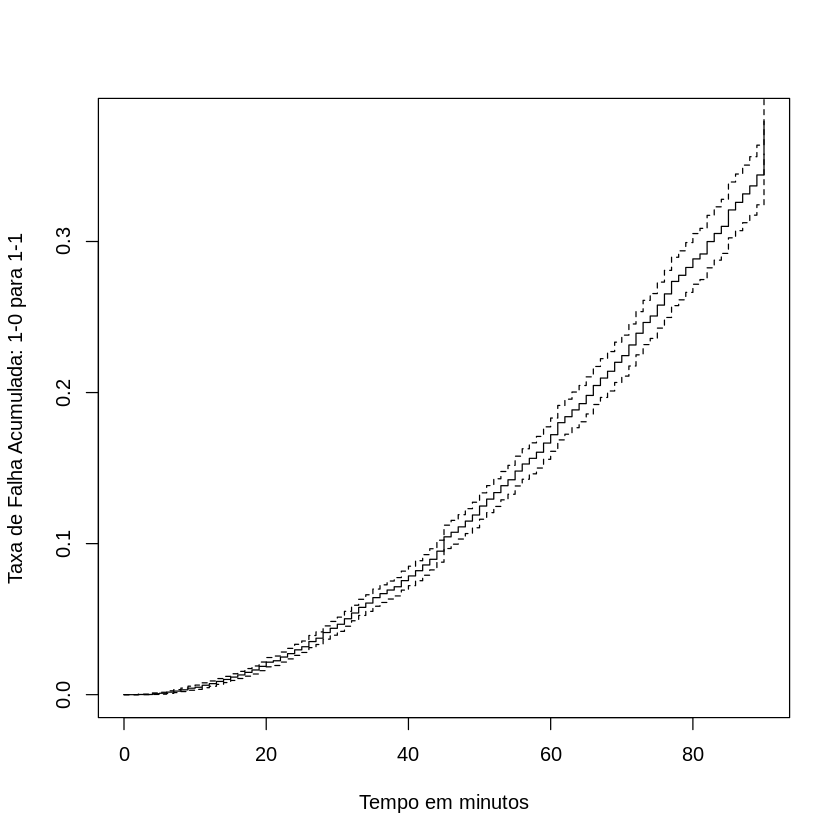

In [12]:
surv2 <- survfit(fit_10_11_B);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", 
     ylab="Taxa de Falha Acumulada: 1-0 para 1-1");

## 5.3.3) Modelo de Riscos Porporcionais de Cox - 1.º Golo Fora 2.º Golo Casa (01_11)



In [48]:
#modelo 0-1 para 1-1
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, tempo,
((cens+equip)%2 + equip_golo1)/2 as cens, liga, odds from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$tempo;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
odds <- as.numeric(sec_goal$odds);
# reatribuir valores para liga diferente
#part <- factor(sec_goal$part);
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
fit_01_11 <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
summary(fit_01_11);
#fit2 <- survfit(Surv(temp,cens) ~ liga);
#quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 9258, number of events= 1672 

          coef exp(coef) se(coef)      z Pr(>|z|)
liga2  0.04957   1.05082  0.08754  0.566    0.571
liga3  0.14508   1.15613  0.09109  1.593    0.111
liga4 -0.04343   0.95750  0.08904 -0.488    0.626
liga5 -0.04232   0.95856  0.08791 -0.481    0.630
liga6  0.01941   1.01960  0.08709  0.223    0.824
odds  -0.01221   0.98787  0.01269 -0.962    0.336

      exp(coef) exp(-coef) lower .95 upper .95
liga2    1.0508     0.9516    0.8852     1.247
liga3    1.1561     0.8650    0.9671     1.382
liga4    0.9575     1.0444    0.8042     1.140
liga5    0.9586     1.0432    0.8068     1.139
liga6    1.0196     0.9808    0.8596     1.209
odds     0.9879     1.0123    0.9636     1.013

Concordance= 0.521  (se = 0.008 )
Rsquare= 0.001   (max possible= 0.954 )
Likelihood ratio test= 7.3  on 6 df,   p=0.3
Wald test            = 7.41  on 6 df,   p=0.3
Score (logrank) test = 7.42  on 6 df,   p=0

# retirar ligas=6

In [49]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="1", "27"="1", "28"="1", "29"="1", "30"="1"));
fit_01_11_B <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_01_11$loglik[2]-fit_01_11_B$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.0497349

[1] 0.3781149

In [50]:
summary(fit_01_11_B)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)  
liga2  0.03848979 1.0392401 0.07191046  0.5352461 0.59247972
liga3  0.13399591 1.1433881 0.07618914  1.7587271 0.07862387
liga4 -0.05451597 0.9469434 0.07371464 -0.7395543 0.45957051
liga5 -0.05344659 0.9479566 0.07223032 -0.7399467 0.45933234
odds  -0.01238074 0.9876956 0.01266305 -0.9777060 0.32821977

# retirar ligas=2

In [51]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="1", "7"="1", "8"="1", "9"="1", "10"="1", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="1", "27"="1", "28"="1", "29"="1", "30"="1"));
fit_01_11_C <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_01_11_B$loglik[2]-fit_01_11_C$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 0.2854276

[1] 0.3781149

In [52]:
summary(fit_01_11_C)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)  
liga3  0.12039905 1.1279469 0.07171679  1.6788126 0.09318857
liga4 -0.06810889 0.9341587 0.06908496 -0.9858716 0.32419615
liga5 -0.06703877 0.9351589 0.06749955 -0.9931736 0.32062536
odds  -0.01239792 0.9876786 0.01267291 -0.9783009 0.32792550

# retirar odds

In [53]:
fit_01_11_D <- coxph(Surv(temp, cens) ~ liga, method="breslow");
TRV <- 2*(fit_01_11_C$loglik[2]-fit_01_11_D$loglik[2])
pvalue <- pchisq(0.95, 1)
TRV
pvalue

[1] 0.9847715

[1] 0.6702807

# parar
## incluir modelo com odds

In [54]:
summary(fit_01_11_C)[7]$coefficients;

coef        exp(coef) se(coef)   z          Pr(>|z|)  
liga3  0.12039905 1.1279469 0.07171679  1.6788126 0.09318857
liga4 -0.06810889 0.9341587 0.06908496 -0.9858716 0.32419615
liga5 -0.06703877 0.9351589 0.06749955 -0.9931736 0.32062536
odds  -0.01239792 0.9876786 0.01267291 -0.9783009 0.32792550

In [59]:
#calculo do risco de base para part=1, liga=1 e odds=1
betas_01_11 <- fit_01_11_C$coefficients
ht_01_11 <- basehaz(fit_01_11_C, centered=F);
tempo_3 <- ht_01_11$time;
H0_01_11 <- ht_01_11$hazard;
S0_01_11 <- exp(-H0_01_11);
S1_01_11 <- S0_01_11^exp(betas_01_11[4]);
S2_01_11 <- S0_01_11^exp(betas_01_11[4]*2);
S5_01_11 <- S0_01_11^exp(betas_01_11[4]*5);
plot(tempo_3, S1_01_11, lty=1, type="l", xlab="Tempo (minutos)", 
     ylab="S(t|x)");
lines(c(0, tempo_3), c(1, S2_01_11), lty=2);
lines(c(0, tempo_3), c(2, S5_01_11), lty=3);
legend(1, 0.8, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"));

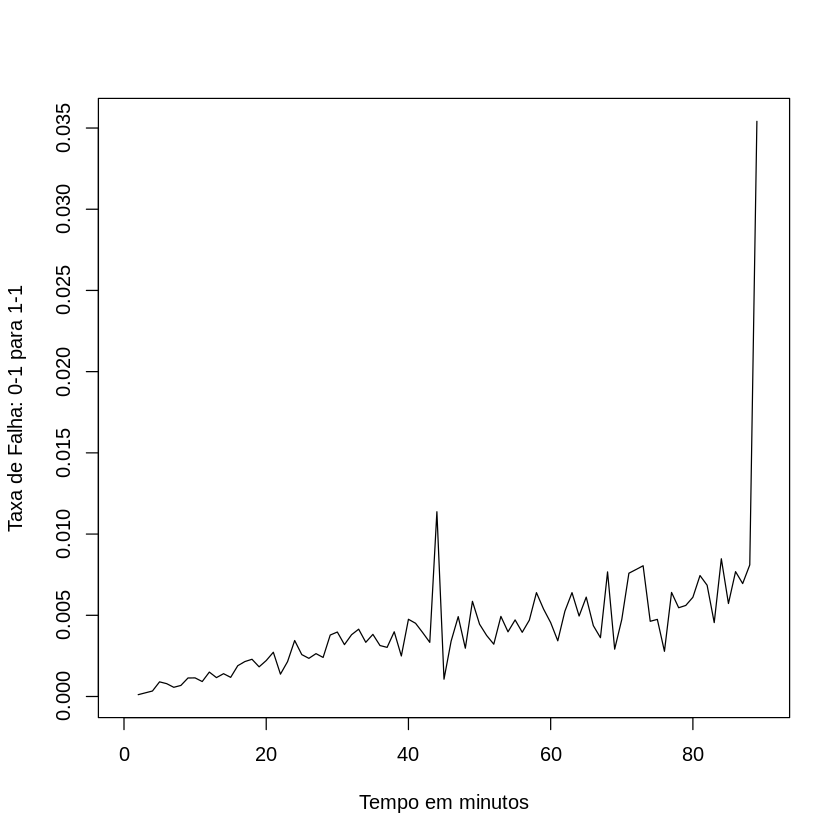

In [23]:
Ht_2<-basehaz(fit_01_11_C,centered=F)
l3=(Ht_2[2:dim(Ht_2)[1],1]-Ht_2[1:dim(Ht_2)[1]-1,1])/(Ht_2[2:dim(Ht_2)[1],2]-Ht_2[1:dim(Ht_2)[1]-1,2])
plot(tempo_3[1:length(tempo_3)-1],l3,lty=1,type="l",
     xlim=range(c(0,max(tempo_3))),xlab="Tempo em minutos",
     ylab="Taxa de Falha: 0-1 para 1-1");

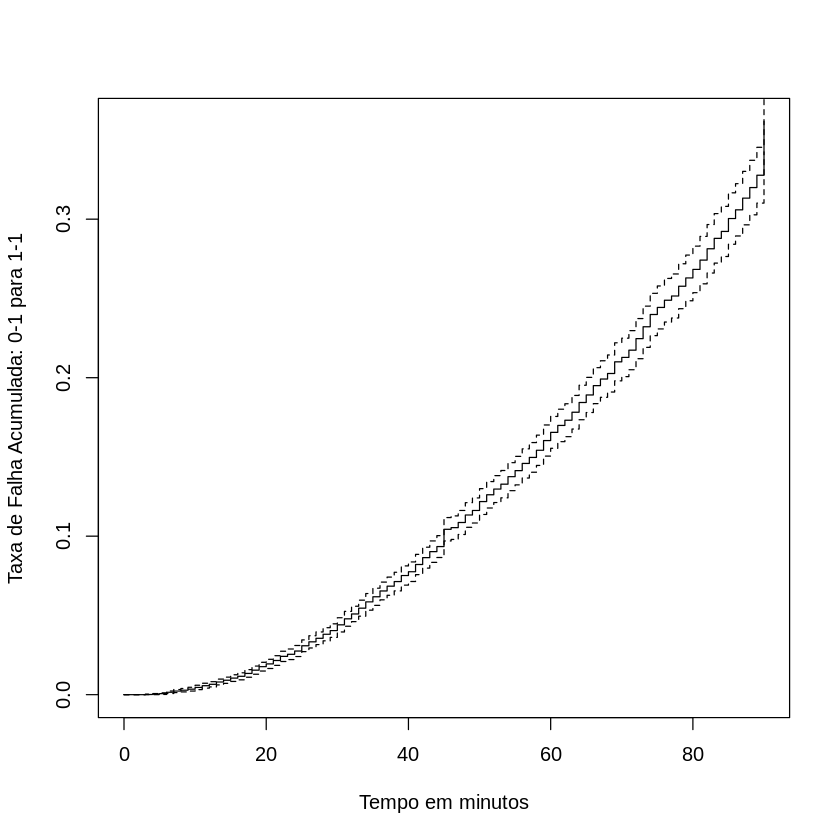

In [24]:
surv2 <- survfit(fit_01_11_C);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos",
     ylab="Taxa de Falha Acumulada: 0-1 para 1-1");

## 5.3.4) Modelo de Riscos Porporcionais de Cox - 1.º Golo Fora 2.º Golo Fora (01_02)


In [25]:
#modelo 0-1_0-2
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql <- 'select id, tempo, (cens+equip+equip_golo1)/3 as cens,
liga, odds from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$tempo;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
odds <- as.numeric(sec_goal$odds);
# reatribuir valores para liga diferente
#part <- factor(sec_goal$part);
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="2", "7"="2", "8"="2", "9"="2", "10"="2", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="6", "27"="6", "28"="6", "29"="6","30"="6"));
fit_01_02 <- coxph(Surv(temp, cens) ~ liga + odds,
                   method="breslow");
summary(fit_01_02);
#fit2 <- survfit(Surv(temp,cens) ~ liga);
#quantile(fit2)$quantile;

Call:
coxph(formula = Surv(temp, cens) ~ liga + odds, method = "breslow")

  n= 9258, number of events= 1409 

          coef exp(coef) se(coef)      z Pr(>|z|)    
liga2 0.204444  1.226842 0.097799  2.090 0.036577 *  
liga3 0.367569  1.444219 0.101075  3.637 0.000276 ***
liga4 0.342048  1.407829 0.098367  3.477 0.000507 ***
liga5 0.250108  1.284164 0.100495  2.489 0.012819 *  
liga6 0.253145  1.288069 0.099764  2.537 0.011167 *  
odds  0.172733  1.188549 0.006592 26.205  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

      exp(coef) exp(-coef) lower .95 upper .95
liga2     1.227     0.8151     1.013     1.486
liga3     1.444     0.6924     1.185     1.761
liga4     1.408     0.7103     1.161     1.707
liga5     1.284     0.7787     1.055     1.564
liga6     1.288     0.7764     1.059     1.566
odds      1.189     0.8414     1.173     1.204

Concordance= 0.686  (se = 0.008 )
Rsquare= 0.048   (max possible= 0.927 )
Likelihood ratio test= 459.1  on 6 df, 

# retirar ligas=2

In [27]:
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1",
                         "6"="1", "7"="1", "8"="1", "9"="1", "10"="1", 
                         "11"="3","12"="3", "13"="3", "14"="3", "15"="3", 
                         "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", 
                         "26"="6", "27"="6", "28"="6", "29"="6", "30"="6"));
fit_01_02_B <- coxph(Surv(temp, cens) ~ liga + odds, method="breslow");
TRV <- 2*(fit_01_02$loglik[2]-fit_01_02_B$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

[1] 4.421482

[1] 0.3781149

# PARAR
##### todas as covars são significativas

In [28]:
#calculo do risco de base para part=1, liga=1 e odds=1,2,5
betas_01_02 <- fit_01_02$coefficients
ht_01_02 <- basehaz(fit_01_02, centered=F)
tempo_2 <- ht_01_02$time
H0_01_02 <- ht_01_02$hazard
S0_01_02 <- exp(-H0_01_02)
S1_01_02 <- S0_01_02^exp(betas_01_02[6])
S2_01_02 <- S0_01_02^exp(betas_01_02[6]*2)
S5_01_02 <- S0_01_02^exp(betas_01_02[6]*5)
plot(tempo_2, S1_01_02, lty=1, type="l", xlab="Tempo (minutos)",
     ylab="S(t|x)", ylim=c(0.7,1.0), col=colors);
lines(c(0, tempo_2), c(1, S2_01_02), lty=2, col=colors[2])
lines(c(0, tempo_2), c(2, S5_01_02), lty=3, col=colors[3])
legend(1, 0.8, lty=c(1, 2, 3), c("odds=1", "odds=2", "odds=5"),
       col=colors)

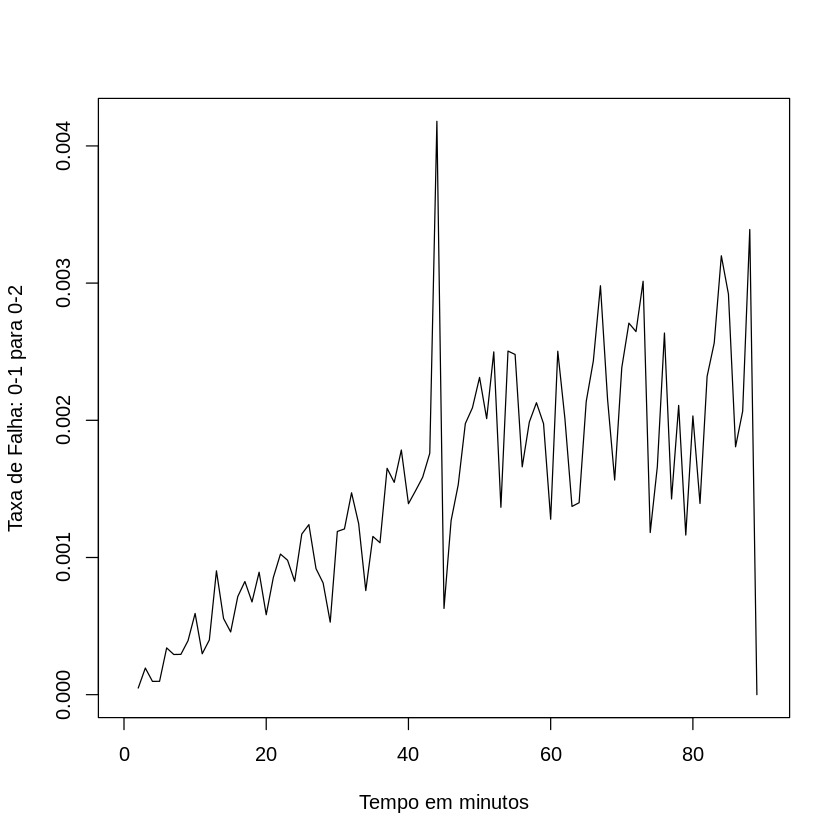

In [29]:
Ht<-basehaz(fit_01_02,centered=F)
l2=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo_2[1:length(tempo_2)-1],l2,lty=1,type="l",
     xlim=range(c(0,max(tempo_2))),xlab="Tempo em minutos",
     ylab="Taxa de Falha: 0-1 para 0-2");

In [30]:
surv2 <- survfit(fit_01_02);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", 
     ylab="Taxa de Falha Acumulada: 0-1 para 0-2");

## Comparação de Taxa de Falha 1-0 para 2-0 vs. 1-0 para 1-1

In [46]:
plot(tempo_0[1:length(tempo_0)-1], l0, lty=1,type="l",
     xlim=range(c(0,max(tempo_0))),xlab="Tempo em minutos",
     ylim=c(0,0.06),ylab="Taxa de Falha");
lines(c(1, tempo_1[1:length(tempo_1)-1]), c(1, l1), lty=2)
legend(10, 0.05, lty=c(1, 2), c("1-0 => 2-0", "1-0 => 1-1"));

## Comparação de Taxa de Falha 0-1 para 0-2 vs. 0-1 para 1-1

In [32]:
plot(tempo_2[1:length(tempo_2)-1], l2, lty=1,type="l",
     xlim=range(c(0,max(tempo_3))),xlab="Tempo em minutos",
     ylim=range(c(0,0.011)), ylab="Taxa de Falha");
lines(c(1, tempo_3[1:length(tempo_3)-1]), c(1, l3), lty=2)
legend(10, 0.008, lty=c(1, 2), c("0-1 => 0-2", "0-1 => 1-1"));

### 5.4. Análise de Sobrevivência de 2.º Golo ($t_i$) com $t_0$=1.º Golo

$t_i$ corresponde ao tempo em que ocorreu evento de $_i$nteresse

In [ ]:
foot <- dbConnect(RSQLite::SQLite(), "foot.db");
sql = 'select id, diff, cens, equip, liga, odds from goal_2';
sec_goal <- dbGetQuery(foot, sql);
temp <- sec_goal$diff;
cens <- sec_goal$cens;
ligas <- factor(sec_goal$liga);
# reatribuir valores para liga diferente
liga <- revalue(ligas, c("2"="1", "3"="1", "4"="1", "5"="1","6"="2", "7"="2", "8"="2", "9"="2", "10"="2", "11"="3",
                         "12"="3", "13"="3", "14"="3", "15"="3", "16"="4", "17"="4", "18"="4", "19"="4", "20"="4",
                         "21"="5", "22"="5", "23"="5", "24"="5", "25"="5", "26"="6", "27"="6", "28"="6", "29"="6",
                         "30"="6"));
odds <- as.numeric(sec_goal$odds);
fit <- coxph(Surv(temp, cens) ~ equip + liga + odds, 
             method="breslow");
summary(fit);
fit2 <- survfit(Surv(temp,cens) ~ liga);
quantile(fit2)$quantile;

In [ ]:
rsch <- resid(fit, type="scaledsch");
summary(rsch);

In [ ]:
cox.zph(fit, transform="identity");
par(mfrow=c(3, 3));
plot(cox.zph(fit));

retirando a variável "part" e a variável "same" que não respeitam a hipótese de proporcionalidade de riscos pode-se passar à fase de escolha de variáveis

#### 5.4.2. Análise de Sobrevivência para 2.º Golo do Jogo com $t_0$=1.º Golo - selecção de variáveis

In [ ]:
#modelo inicial
fit <- coxph(Surv(temp, cens) ~ equip + liga + odds, 
             method="breslow");
summary(fit);

<strong>com valor-p para odds=0.418351 retirar esta variável e calcular TRV</strong>

In [ ]:
#modelo no. 2: retirada var=odds
fit2 <- coxph(Surv(temp, cens) ~ equip + liga, 
              method="breslow");
summary(fit2);

In [ ]:
TRV <- 2*(fit$loglik[2]-fit2$loglik[2])
pvalue <- pchisq(0.95, 2)
TRV
pvalue

<strong>uma vez que TRV > p-value então existe significância estatística
para afirmar que o modelo inicial é diferente do novo modelo. (reject null)</strong>

PARAR PROCESSO DE SELEÇÃO DE VARIÁVEIS => usar modelo com "odds"

In [ ]:
#modelo final
fit <- coxph(Surv(temp, cens) ~ equip + liga + odds,
             method="breslow");
summary(fit);

comparar função de risco Casa vs. Fora para odds=1

In [ ]:
htc <- basehaz(fit, centered=F)
tempo <- htc$time
H0 <- htc$hazard
S0 <- exp(-H0)
S_liga1_casa <- S0^exp(fit$coefficients[7]) #odds=1
S_liga1_fora <- S0^exp(fit$coefficients[7] + fit$coefficients[1]) #odds=1
plot(tempo, S_liga1_casa, lty=1, type="l", xlab="Tempo (minutos)",
     ylab="S(t|x)")
lines(c(0, tempo), c(1, S_liga1_fora), lty=2)
legend(1, 0.4, lty=c(1, 2), c("Casa", "Fora"))

comparar função de risco diversas Ligas para equipa Casa e odds=1

In [ ]:
htc <- basehaz(fit, centered=F)
tempo <- htc$time
H0 <- htc$hazard
S0 <- exp(-H0)
S_liga1_casa <- S0^exp(fit$coefficients[7]) #odds=1
S_liga2_casa <- S0^exp(fit$coefficients[7] + fit$coefficients[2]) #odds=1
S_liga3_casa <- S0^exp(fit$coefficients[7] + fit$coefficients[3]) #odds=1
S_liga4_casa <- S0^exp(fit$coefficients[7] + fit$coefficients[4]) #odds=1
S_liga6_casa <- S0^exp(fit$coefficients[7] + fit$coefficients[6]) #odds=1
plot(tempo, S_liga1_casa, lty=1, type="l", xlab="Tempo (minutos)", 
     ylab="S(t|x)", col=colors[1])
lines(c(0, tempo), c(1, S_liga2_casa), lty=2, col=colors[2])
lines(c(0, tempo), c(1, S_liga3_casa), lty=3, col=colors[3])
lines(c(0, tempo), c(1, S_liga4_casa), lty=4, col=colors[4])
lines(c(0, tempo), c(1, S_liga6_casa), lty=6, col=colors[6])
legend(1, 0.4, lty=c(1, 2, 3, 4, 5, 6), c("Portugal","Espanha",
                                          "Alemanha","Inglaterra","Itália"),
       col=colors);

<strong>salientes-se que 3 ligas têm coeficientes muito semelhantes: Espanha, Inglaterra e Itália</strong>

In [ ]:
Ht<-basehaz(fit,centered=F)
l0=(Ht[2:dim(Ht)[1],1]-Ht[1:dim(Ht)[1]-1,1])/(Ht[2:dim(Ht)[1],2]-Ht[1:dim(Ht)[1]-1,2])
plot(tempo[1:length(tempo)-1],l0,lty=1,type="l",
     xlim=range(c(0,max(tempo))),xlab="Tempo em minutos",
     ylab="Taxa de Falha");

In [ ]:
surv2 <- survfit(fit);
plot(surv2, fun="cumhaz", xlab="Tempo em minutos", 
     ylab="Taxa de Falha Acumulada");